<a href="https://colab.research.google.com/github/ssweta3seal/Seoul_Bike_Sharing/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#mounted the drive
from google.colab import drive                                                                                                                                                                                                                                                                                                                                                                                                                                                                
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read the .csv file to dataframe bikedata
bikedata = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Machine Learning Capstone project/REGRESSION/SEOUL BIKE SHARING/SeoulBikeData (1).csv",encoding="unicode_escape")



In [5]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
bikedata.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
bikedata.shape

(8760, 14)

In [8]:
bikedata.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [9]:

bikedata['Date'] = (bikedata['Date'])
bikedata.dtypes


Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [10]:
#Describe the data
bikedata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


There are 14 columns .

# Missing Values

In [11]:

bikedata.isnull().sum()
bikedata.isna().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Duplicate values

In [12]:
len(bikedata[bikedata.duplicated()])

0

By God's there is no missing value in the data set which reduces the treatment of null values

In [13]:
bikedata.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [14]:
 bikedata ['month'] = pd.DatetimeIndex(bikedata ['Date']).month
 bikedata ['year'] = pd.DatetimeIndex(bikedata ['Date']).year
 bikedata ['day'] = pd.DatetimeIndex(bikedata ['Date']).day_name()

In [15]:
bikedata

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday


In [16]:
bikedata['weekdays_weekend']=bikedata['day'].apply(lambda x: 1 if x== 'Saturday' or x=='Sunday' else 0)

In [17]:
bikedata.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year,day,weekdays_weekend
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday,0
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday,0
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday,0
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday,0
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,Friday,0


In [18]:
bikedata['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [19]:
cols=['Hour','month','weekdays_weekend']
for col in category:
  bikedata[col]=bikedata[col].astype('category')

NameError: ignored


# Exploring the dependent variables : Rented Bike Count

[Text(0.5, 1.0, 'Monthly Count Of Rented Bike ')]

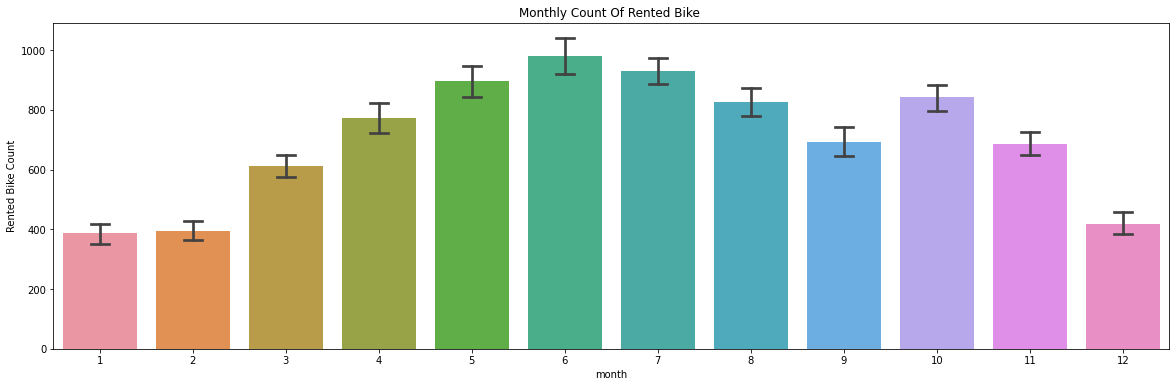

In [21]:
# plot for mothly rented bike count

fig,ax= plt.subplots(figsize=(20,6))
sns.barplot(data=bikedata,x='month',y='Rented Bike Count',capsize=.2)
ax.set(title='Monthly Count Of Rented Bike ')


[Text(0.5, 1.0, 'Weekly Count Of Rented Bike ')]

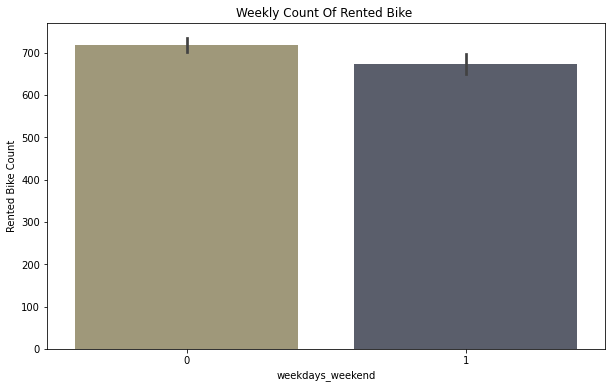

In [22]:
fig,ax= plt.subplots(figsize=(10,6))
sns.barplot(data=bikedata,x='weekdays_weekend',y='Rented Bike Count',palette="cividis_r")
ax.set(title='Weekly Count Of Rented Bike ')


[Text(0.5, 1.0, 'Count Of Rented Bike accordingly to weekdays_weekend')]

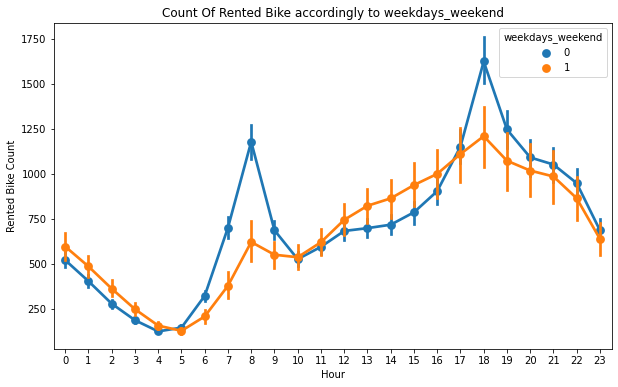

In [23]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=bikedata,x='Hour',y='Rented Bike Count',hue='weekdays_weekend')
ax.set(title='Count Of Rented Bike accordingly to weekdays_weekend')


*   From the above plots we can say that in weekdays whcih represent in blue colour show the demand of the bike higher because of the office
*   Peak Time is 7am to 9am in the morning and 5pm to 7pm in evening.
*   The orange colour represent  the weekend demand of the bike which are low in morninh hour increases from 4pm to 8pm in the evening
*   List item






[Text(0.5, 1.0, 'Hourly demand Of Rented Bike ')]

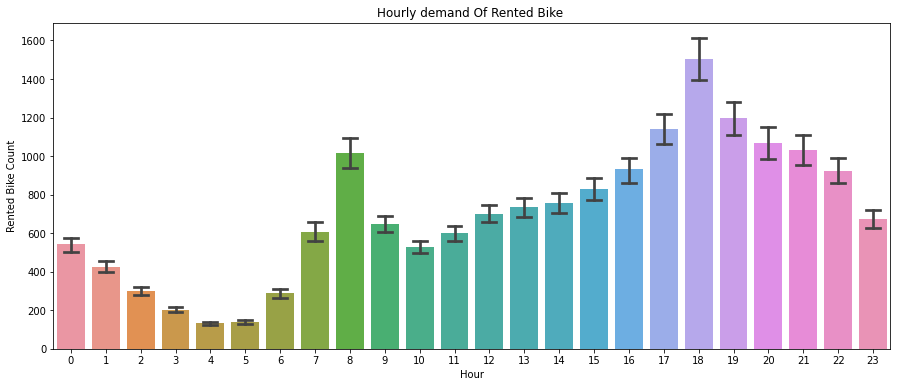

In [24]:

fig,ax= plt.subplots(figsize=(15,6))
sns.barplot(data=bikedata,x='Hour',y='Rented Bike Count',ax=ax,capsize=.4)
ax.set(title='Hourly demand Of Rented Bike ')

In the above plot which shows the use of rented bike according to the hours and the data are from all over the year
Generaly people use rented bike during their working hour from 7am to 9 am and 5pm to 7pm

## Functioning Day

[Text(0.5, 1.0, 'Weekly Count Of Rented Bike ')]

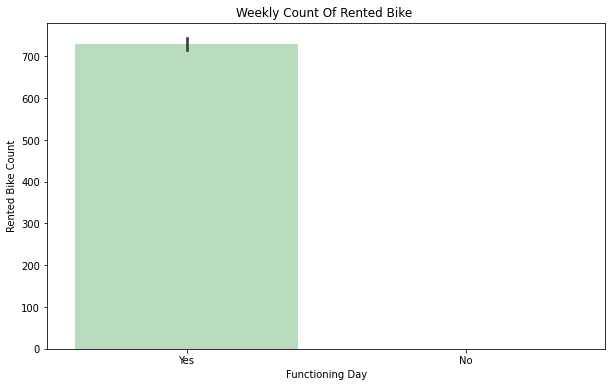

In [25]:
fig,ax= plt.subplots(figsize=(10,6))
sns.barplot(data=bikedata,x='Functioning Day',y='Rented Bike Count',palette="GnBu")
ax.set(title='Weekly Count Of Rented Bike ')

[Text(0.5, 1.0, 'Count Of Rented Bike accordingly to Functioning Day')]

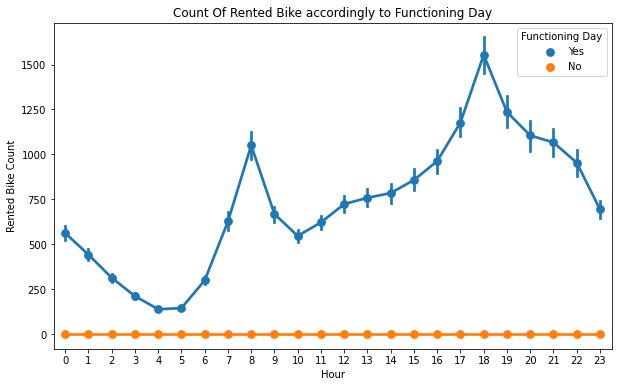

In [26]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=bikedata,x='Hour',y='Rented Bike Count',hue='Functioning Day')
ax.set(title='Count Of Rented Bike accordingly to Functioning Day')

The above plot shaows the use of rented bike in functioning  days or not  ab=nd it is cleary sen that people dont use rented bike in non functioning day **like weekends**

# Hour Basis

[Text(0.5, 1.0, 'Monthly Count Of Rented Bike ')]

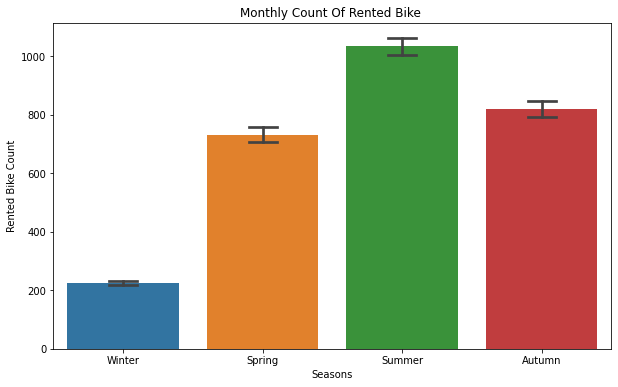

In [27]:
fig,ax= plt.subplots(figsize=(10,6))
sns.barplot(data=bikedata,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Monthly Count Of Rented Bike ')

[Text(0.5, 1.0, 'Count Of Rented Bike accordingly to Seasons')]

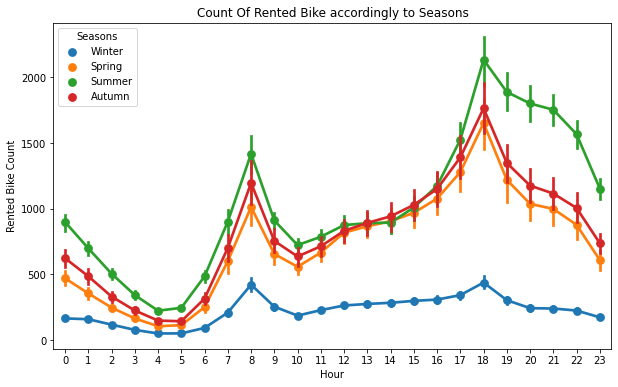

In [28]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=bikedata,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count Of Rented Bike accordingly to Seasons')

In the above plot whixh shows the use of rented bike in 4 seasons and it is clearly visible that


1.   In summers the use of rented bike is high and peak time is 5pm to 7pm
2.   In winters the use of rented bike is low due to snowfall


# Holiday

[Text(0.5, 1.0, ' Count Of Rented Bike according to Holiday ')]

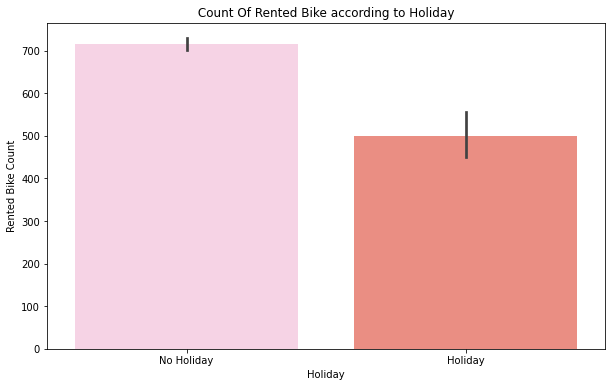

In [29]:
fig,ax= plt.subplots(figsize=(10,6))
sns.barplot(data=bikedata,x='Holiday',y='Rented Bike Count',palette="Set3_r")
ax.set(title=' Count Of Rented Bike according to Holiday ')

[Text(0.5, 1.0, 'Count Of Rented Bike accordingly to Holiday')]

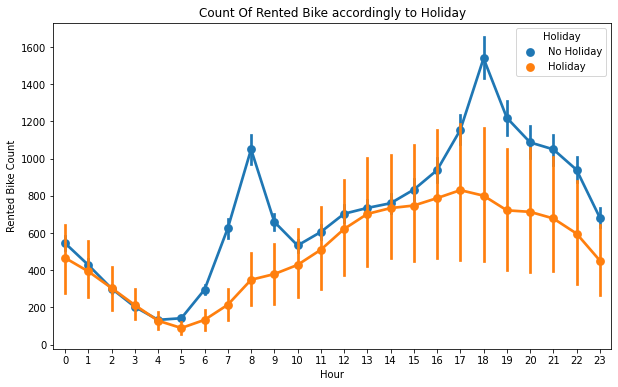

In [30]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=bikedata,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count Of Rented Bike accordingly to Holiday')

Text(0.5, 0, 'Temperature')

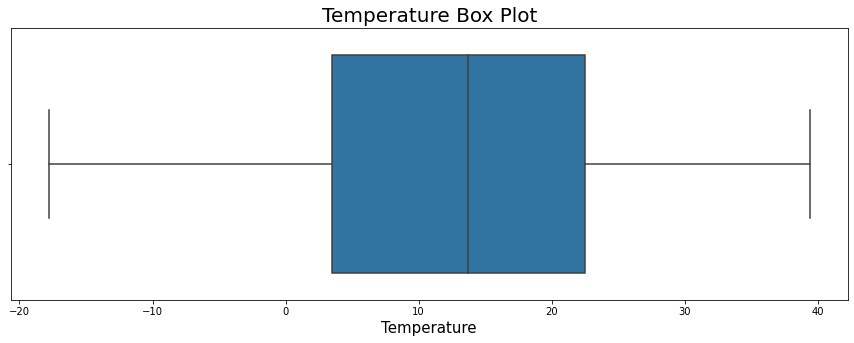

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bikedata, x='Temperature(°C)')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

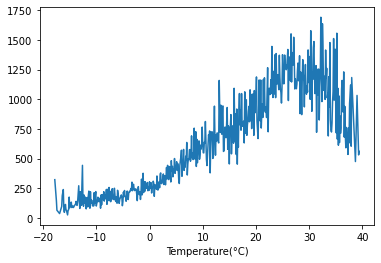

In [32]:
bikedata.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

From the above plot we see that people like to ride bikes when it is pretty hot around 20°C in average

Text(0.5, 0, 'Dew Point')

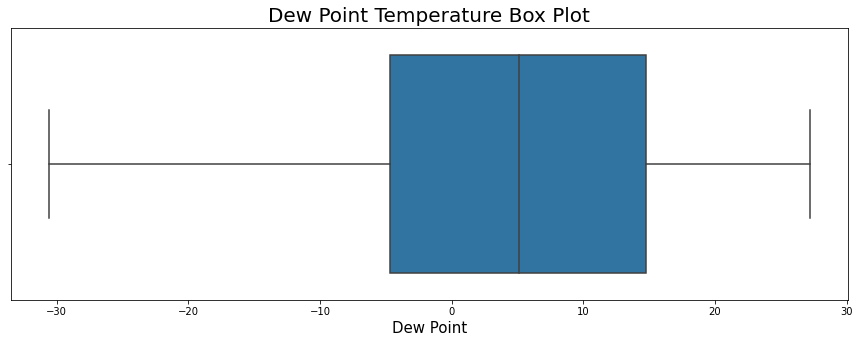

In [37]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bikedata, x='Dew point temperature(°C)')
plt.title('Dew Point Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Dew Point', fontdict={'fontsize': 15})

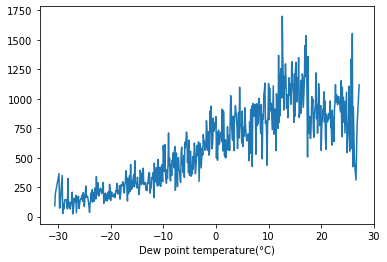

In [33]:
bikedata.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

Text(0.5, 0, ' Solar Radiation')

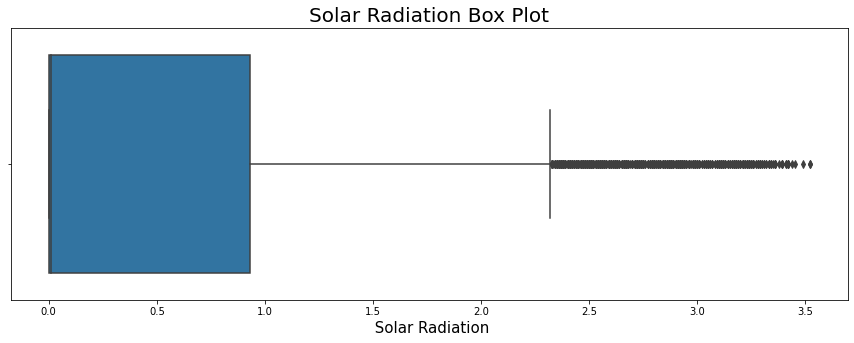

In [41]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bikedata, x='Solar Radiation (MJ/m2)')
plt.title('Solar Radiation Box Plot', fontdict={'fontsize': 20})
plt.xlabel(' Solar Radiation', fontdict={'fontsize': 15})

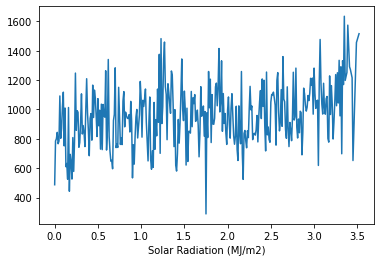

In [34]:
bikedata.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()